<a href="https://colab.research.google.com/github/leejineun/ai-class/blob/main/8_%EC%A4%91%EA%B0%84%EB%B3%B5%EC%8A%B5_%EC%88%98%EC%97%85%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN (Convolution Neural Network)
- 이미지의 공간정보를 보존하여 학습하는 인공 신경망

### 어떻게 공간 정보를 보존하나?
- 이미지를 펼치는 것이 아니라, 픽셀 위치를 유지한 상태에서 연산

### 주요 용어 정리

**합성곱** 

``keras.layers.Conv2D``
- 필터가 이미지를 훑으면서, 겹치는 부분의 원소를 곱합 후, 더하여 출력하는 과정
- 합성곱 연산을 통해 나온 결과를 **특성 맵(feature map)**이라 함

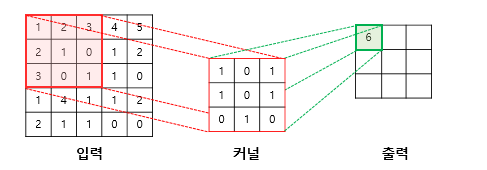

<출처 - https://wikidocs.net/64066>
    
**필터(커널)**

``keras.layers.Conv2D(filters=32, kernel_size=(3,3))``
- 이미지에서 정보를 얻기 위해 곱해지는 것
- 주로 3x3, 5x5 필터를 사용하며, 비대칭 모양도 가능하다.

**스트라이드**

``keras.layers.Conv2D(strides=(1,1))``
- 필터가 이미지를 몇 칸씩 훑을 것인지 정한 값
- 출력되는 이미지 크기에 영향을 준다

**채널**

``(1, 32, 32, 1)``
``(1, 32, 32, 3)``
- 이미지의 색상을 표현하는 값 (gray : 1, color: 3)
- 필터가 곱해질 경우, 채널의 수는 필터의 수와 같아진다.

**패딩**

``keras.layers.Conv2D(padding='same')``
- 이미지의 모서리 부분의 학습을 위해 사용
- 합성곱 이후에도 이미지의 크기를 유지하기 위해 사용

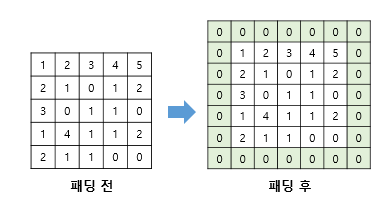

<출처 - https://wikidocs.net/64066>

**활성화 함수**

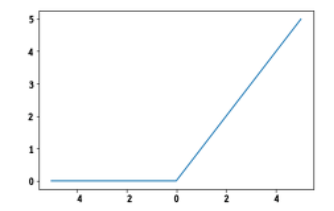

``keras.layers.Activation()``
- 출력값을 조절하기 위한 비선형 함수
- 비선형성이 높을 수록 복잡한 패턴을 잘 파악
- 은닉층에선 주로 relu, 출령측에서는 다중클래스 분류일 경우 ``softmax``, 이진 분류 ``sigmoid`` 사용

**풀링**

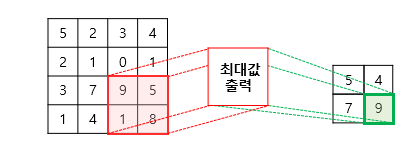

``MaxPool2D()``
- 데이터의 크기를 줄여, 전체 파라미터 수를 줄여준다
- 공간 변화를 덜 받게 한다
- 채널 수에는 변화가 없다


**드롭아웃**

``keras.layers.Dropout()``
- 일부 노드의 연결을 끊어서, 오버 피팅 방지 

**Batch Normalization**

``Conv2D()``

``BatchNoramalization()``

``Activation('relu')``

- batch 형태로 넣다보면, 계층마다 데이터의 분포가 달라지는데, 이를 방지하기 위해 배치 정규화 시행
- Conv Layer나 FC Layer와 활성화 함수 사이에 적용하는 것을 추천


**완전연결계층(Fully Connected Layer)**

``keras.layers.Dense()``
- 한 층의 모든 뉴런이 다음 층의 모든 뉴런과 연결된 상태
- 1차원 배열의 형태로 평탄화된 행렬을 통해 이미지 분류에 사용되는 계층

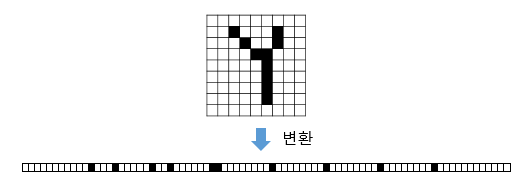

<출처 - https://wikidocs.net/64066>

**에폭**

``model.fit(epochs=32)``
- 전체 데이터가 한 번의 순전파와 한 번의 역전파를 하는 것
- 너무 낮으면 underfitting, 너무 높으면 overfitting
- earlyStopping을 통해 조절 가능


**배치사이즈**

``model.fit(batch_size=32)``
- 한 번의 학습당 들어갈 데이터의 수


**손실함수**

``model.compile(loss='binary_crossentropy')``
- 실제값과 예측값 차이를 계산하는 함수

    - ``binary_crossentropy`` : 이진분류
    - ``categorical_crossentropy`` : 원-핫 인코딩 된 multi class classification
    - ``sparse_categorical_crossentropy`` : 라벨이 정수형태로 제공될 때
    - MSE(Mean squared Error) 등


**optimizer**
- 가중치 최적화를 하는 알고리즘


**전이학습**

- 사전에 분석된 모델을 활용하여, 모델을 구축
- 분류기만 바꾸면 특징 추출, 가중치도 재학습하면 파인튜닝

### 그 외
**class weight**
- imbalance class의 가중치를 조정하여, 모델이 데이터 수가 많은 클래스쪽으로 예측하도록 학습하는 것을 방지한다

**그리드 서치**
- 각종 하이퍼 파라미터들을 바꿔가면서 모델을 학습시킨다.
- 딥러닝의 경우에는 학습시간이 오래 걸리는 경우가 많으므로, 이 경우에는 모델 작성자의 경험에 의존하여 진행한다.

**augmentation**
- 데이터가 부족한 경우, 기존의 데이터에 여러 변형을 주어 데이터를 늘린다
- 주로 train 데이터 셋에만 적용시킨다

## 절차

0. 목표 확인
1. 이미지 로드
2. 이미지 탐색 및 라벨 탐색 (이미지 수, 라벨 수, 이미지 특징 등 파악)
3. 이미지 전처리 (정규화, 리사이징, reshape 등)
4. 모델 작성 (전이 학습 등)
5. 모델 학습
6. 모델 평가 (accuarcy, precision, recall, f-1 score 등 확인)



## 데이터 수집부터의 절차
**0. 프로젝트 계획 수립 (SOW, 프로젝트 정의서 등)**

**1. 데이터 준비**

    - 데이터 정의서, 획득 계획서 등 작성
    - 데이터 스토어 설계 (설계서 작성)
    - 수집 및 데이터 확인 (데이터 점검 보고서 작성)

**2. 데이터 분석**

    - EDA, 전처리
    - 모델링 (만족 수준까지 모델 튜닝 무한반복)
    - 모델 알고리즘 설명서 작성
    - 모델 평가 보고서 / 모델 검증 보고서 작성


**3. 시스템 구현**

    - 시스템화 필요시 시스템 구현
    - 시스템 설계서 작성

**4. 평가 및 배포**

    - 추후 모델 발전 가능성 정리
    - 프로젝트 최종 보고서 작성




In [ ]:
### 연습문제

In [ ]:
from tensorflow.keras.datasets import cifar100

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
y_train

In [ ]:
class_names = [
'apple',
'aquarium_fish',
'baby',
'bear',
'beaver',
'bed',
'bee',
'beetle',
'bicycle',
'bottle',
'bowl',
'boy',
'bridge',
'bus',
'butterfly',
'camel',
'can',
'castle',
'caterpillar',
'cattle',
'chair',
'chimpanzee',
'clock',
'cloud',
'cockroach',
'couch',
'crab',
'crocodile',
'cup',
'dinosaur',
'dolphin',
'elephant',
'flatfish',
'forest',
'fox',
'girl',
'hamster',
'house',
'kangaroo',
'computer_keyboard',
'lamp',
'lawn_mower',
'leopard',
'lion',
'lizard',
'lobster',
'man',
'maple_tree',
'motorcycle',
'mountain',
'mouse',
'mushroom',
'oak_tree',
'orange',
'orchid',
'otter',
'palm_tree',
'pear',
'pickup_truck',
'pine_tree',
'plain',
'plate',
'poppy',
'porcupine',
'possum',
'rabbit',
'raccoon',
'ray',
'road',
'rocket',
'rose',
'sea',
'seal',
'shark',
'shrew',
'skunk',
'skyscraper',
'snail',
'snake',
'spider',
'squirrel',
'streetcar',
'sunflower',
'sweet_pepper',
'table',
'tank',
'telephone',
'television',
'tiger',
'tractor',
'train',
'trout',
'tulip',
'turtle',
'wardrobe',
'whale',
'willow_tree',
'wolf',
'woman',
'worm',
]

In [ ]:
len(class_names)

In [ ]:
# 10개의 이미지를 랜덤으로 뽑아서, shape을 출력해보세요

In [ ]:
# 여러 장의 이미지를 하나의 표에 띄워보세요
# 표를 띄웠다면 각 사진의 제목도 같이 표기해보세요

In [ ]:
# 라벨을 원핫 인코딩 하세요
from tensorflow.keras.utils import to_categorical

In [ ]:
# 이미지 정규화를 진행하세요


In [ ]:
# 모델을 만들어보세요 epoch은 10
from keras.layers import Dense, Conv2D, Flatten, Dropout, BatchNormalization, MaxPool2D, Activation, UpSampling2D, InputLayer
from keras.models import Sequential

In [ ]:
# 학습과정 그래프를 그려보세요

In [ ]:
# classification_report를 만들어 보세요
from sklearn.metrics import classfication_report

In [ ]:
# 전이학습
from tensorflow.keras.applications import MobileNetV2

In [ ]:
# base model을 만들어보세요 (input_shape=128, 128, 3)

In [ ]:
# base 모델이 재학습되지 않도록 설정하세요

In [ ]:
# 다음 모델에 이어서 base 모델과 분류기를 새롭게 추가해보세요
model = Sequential()
model.add(InputLayer(input_shape=(32,32,3)))
model.add(UpSampling2D())
model.add(UpSampling2D())

# 여기서부터 삽입

In [ ]:
# compile

In [ ]:
# summary 확인

In [ ]:
# fit